In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

merge = city.merge(ride, on = 'city')

# Display the data table for preview

merge.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

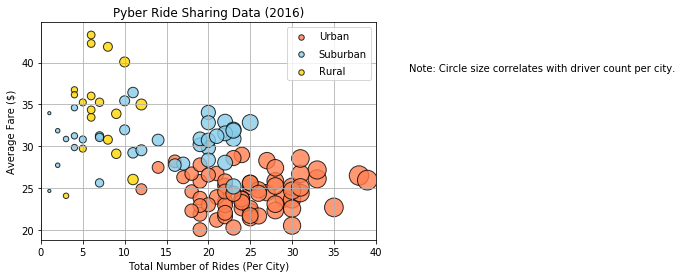

In [2]:
# Obtain the x and y coordinates for each of the three city types

#make each type of city its own list 
urban = merge[merge["type"] == "Urban"]

sub = merge[merge["type"] == "Suburban"]

rural = merge[merge["type"] == "Rural"]

#count the amount of urban rides 
urban_count = urban.groupby(["city"]).count()["ride_id"]
#average fare for urban rides 
urban_avg = urban.groupby(["city"]).mean()["fare"]
#amount of drivers for urban category 
urban_driver = urban.groupby(["city"]).mean()["driver_count"]

#same stats as before for suburb 
sub_count = sub.groupby(["city"]).count()["ride_id"]
sub_avg = sub.groupby(["city"]).mean()["fare"]
sub_count = sub.groupby(["city"]).mean()["driver_count"]


#same stats for rural 
rural_count = rural.groupby(["city"]).count()["ride_id"]
rural_avg = rural.groupby(["city"]).mean()["fare"]
rural_driver = rural.groupby(["city"]).mean()["driver_count"]

# Build the scatter plots for each city types

#urban scatter 
plt.scatter(urban_count,
            urban_avg,
            s=10*urban_count, c="coral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Urban")
#suburb scatter 
plt.scatter(sub_count,
            sub_avg,
            s=10*sub_count, c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Suburban")
#rural scatter
plt.scatter(rural_count,
            rural_avg,
            s=10*rural_count, c="gold", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Rural")

# Incorporate the other graph properties

#title of legend 
plt.title("Pyber Ride Sharing Data (2016)")
#labels y axis 
plt.ylabel("Average Fare ($)")
#labels x-axis 
plt.xlabel("Total Number of Rides (Per City)")
#sets th range of the x-axis 
plt.xlim((0,40))

plt.grid(True)

# Create a legend

lgnd = plt.legend(fontsize="medium", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  labelspacing=0.75)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]


# Incorporate a text label regarding circle size

plt.text(44, 39, "Note: Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("chart1")

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

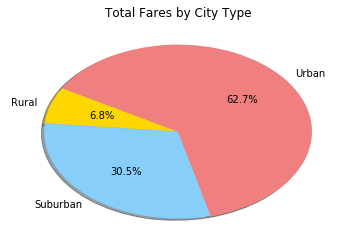

In [4]:
# Calculate Type Percents

type_percents = merge.groupby(["type"]).sum()["fare"] / merge["fare"].sum() * 100

# Build Pie Chart
plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"],  
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title("Total Fares by City Type")
# Save Figure

plt.savefig("Pie1")

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

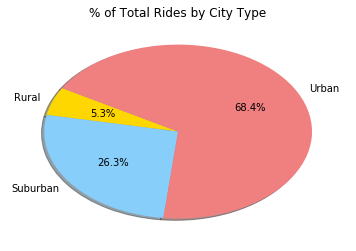

In [6]:
# Calculate Ride Percents

ride_percents = merge.groupby(["type"]).count()["ride_id"] / merge["ride_id"].count() * 100

# Build Pie Chart
plt.pie(ride_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"],  
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Pie2")


In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

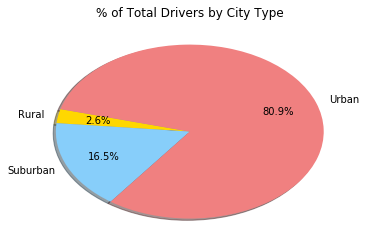

In [8]:
# Calculate Driver Percents

driver_percents = city.groupby(["type"]).sum()["driver_count"] / city["driver_count"].sum() * 100 
# Build Pie Charts
plt.pie(driver_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        autopct='%1.1f%%', pctdistance=0.70,
        shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Pie3")


In [9]:
# Show Figure
plt.show()

In [10]:
# Trend Analysis 
#1. Urban people take more rides than suburban and rural people. 
#2. Due to more people taking more rides in the urban type of cities, there are more drivers in the urban type of cities. 
#3. Suburban people have less drivers than they do rides, so they must have to take more rides. 